<a href="https://colab.research.google.com/github/Tossmax/Big_Cities_Health_Data_Inventory/blob/master/Bluechip%20Data%20%26%20AI%202024%20Summit%20Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
pip install xgboost

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/bluechip-summit-credit-worthiness-prediction/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/bluechip-summit-credit-worthiness-prediction/Test.csv')

In [4]:
# train_data.isnull().sum()
drop_cos = ['ID', 'Loan_ID']
train_data = train_data.drop(columns=drop_cos)

In [5]:
# train_data.replace(to_replace="3+", value=3, inplace=True)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# train_data['Dependents'] = label_encoder.fit_transform(train_data['Dependents'])
from sklearn.preprocessing import LabelEncoder

# Ensure all values in 'Dependents' are strings
train_data['Dependents'] = train_data['Dependents'].astype(str)

# Initialize the LabelEncoder and fit-transform the column
label_encoder = LabelEncoder()
train_data['Dependents'] = label_encoder.fit_transform(train_data['Dependents'])

In [6]:
train_data['TotalIncome_App'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['TotalIncome_App_log'] = np.log(train_data['TotalIncome_App'])

In [7]:
train_data['ApplicantIncome_log'] = np.log(train_data['ApplicantIncome'])

train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['Loan_Amount_Term_log'] = np.log(train_data['Loan_Amount_Term'])
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])


In [8]:
drop_cols = ['Loan_Amount_Term', 'TotalIncome_App', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Total_Income']
train_data = train_data.drop(columns=drop_cols)

In [9]:
X = train_data.drop(columns=['Loan_Status'], axis=1)

In [11]:
y = train_data['Loan_Status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model1 = LogisticRegression(max_iter=500)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8330508474576271

In [15]:
score = cross_val_score(model1, X, y, cv=5)
np.mean(score)

0.8329942065237705

In [16]:
model2 = RandomForestClassifier(random_state=42, n_estimators=100)
model2.fit(X_train, y_train)
y_pred1 = model2.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)

accuracy1

0.8330508474576271

In [17]:
score = cross_val_score(model2, X, y, cv=5)
np.mean(score)

0.8301122755567055

In [18]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred2 = model3.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)

accuracy2

0.8330508474576271

In [19]:
score = cross_val_score(model3, X, y, cv=5)
np.mean(score)

0.7065104009430571

In [20]:
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)
y_pred3 = model4.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)

accuracy3

0.8330508474576271

In [21]:
score = cross_val_score(model4, X, y, cv=5)
np.mean(score)

0.8141747530944062

In [22]:
model6 = xgb.XGBClassifier()
model6.fit(X_train, y_train)
y_pre = model6.predict(X_test)
accuracy8 = accuracy_score(y_test, y_pre)

accuracy8

0.809322033898305

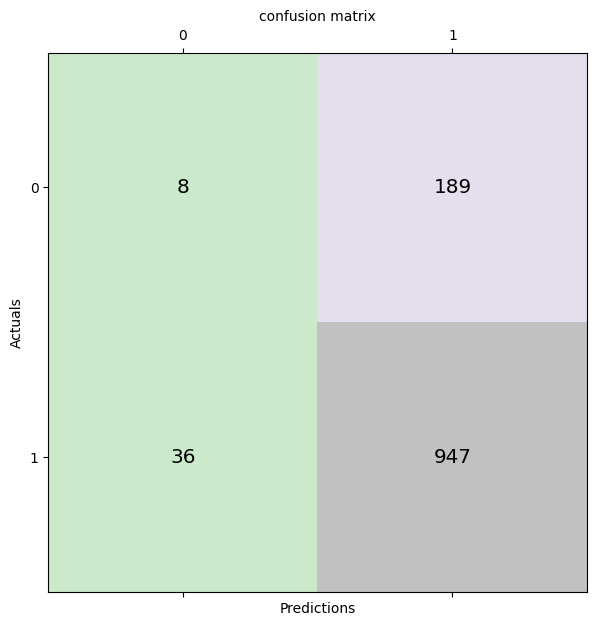

In [23]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pre)

fig, ax = plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('confusion matrix', fontsize=10)
plt.show()

In [24]:
precision_c = round(precision_score(y_test, y_pre), 4)
recall_c = round(recall_score(y_test, y_pre),4)
f1_s = round(f1_score(y_test, y_pre),4)
metrics_o = [precision_c, recall_c, f1_s]

metrics_o

[0.8336, 0.9634, 0.8938]

In [25]:
pip install -U imbalanced-learn

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
oversample = RandomOverSampler(random_state=42)

In [28]:
X_resampled, y_resampled = oversample.fit_resample(X,y)
train_data_resampled = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Loan_Status')],
    axis=1
)

In [29]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
model1 = LogisticRegression(max_iter=500)
model1.fit(X_resampled_train, y_resampled_train)
y_pred = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred)

accuracy

0.5193285859613428

In [31]:
model2 = RandomForestClassifier(random_state=42, n_estimators=100)
model2.fit(X_resampled_train, y_resampled_train)
y_pred1 = model2.predict(X_resampled_test)
accuracy1 = accuracy_score(y_resampled_test, y_pred1)

accuracy1

0.95676500508647

In [32]:
model3 = DecisionTreeClassifier()
model3.fit(X_resampled_train, y_resampled_train)
y_pred2 = model3.predict(X_resampled_test)
accuracy2 = accuracy_score(y_resampled_test, y_pred2)

accuracy2

0.8825025432349949

In [33]:
model4 = KNeighborsClassifier()
model4.fit(X_resampled_train, y_resampled_train)
y_pred3 = model4.predict(X_resampled_test)
accuracy3 = accuracy_score(y_resampled_test, y_pred3)

accuracy3

0.6958290946083419

In [34]:
model5 = svm.SVC(kernel='linear')
model5.fit(X_resampled_train, y_resampled_train)
y_pred4 = model5.predict(X_resampled_test)
accuracy4 = accuracy_score(y_resampled_test, y_pred4)

accuracy4

0.5183112919633774

In [35]:
model6 = xgb.XGBClassifier()
model6.fit(X_resampled_train, y_resampled_train)
y_pre = model6.predict(X_resampled_test)
accuracy8 = accuracy_score(y_resampled_test, y_pre)

accuracy8

0.8413021363173957

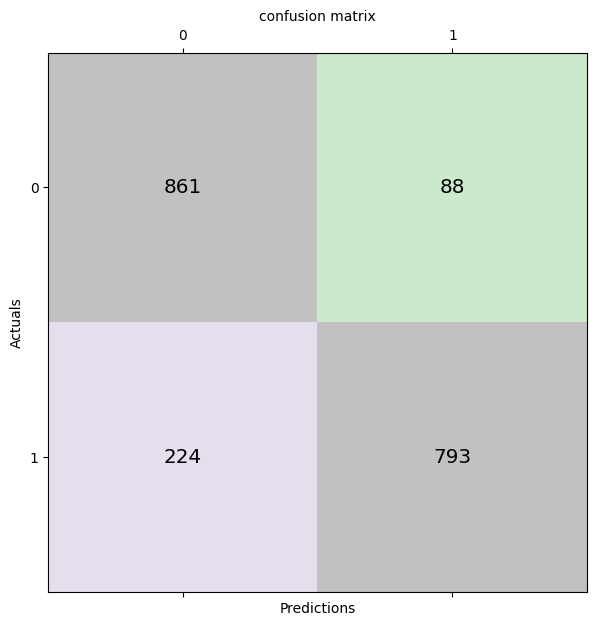

In [36]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
conf_matrix = confusion_matrix(y_true=y_resampled_test, y_pred=y_pre)

fig, ax = plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('confusion matrix', fontsize=10)
plt.show()

In [37]:
precision_c = round(precision_score(y_resampled_test, y_pre), 4)
recall_c = round(recall_score(y_resampled_test, y_pre),4)
f1_s = round(f1_score(y_resampled_test, y_pre),4)
metrics_o = [precision_c, recall_c, f1_s]

metrics_o

[0.9001, 0.7797, 0.8356]

In [38]:
test_data['Dependents'] = label_encoder.fit_transform(test_data['Dependents'])

In [40]:
test_data['TotalIncome_App'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['TotalIncome_App_log'] = np.log(test_data['TotalIncome_App'])

test_data['ApplicantIncome_log'] = np.log(test_data['ApplicantIncome'])

test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])
test_data['Loan_Amount_Term_log'] = np.log(test_data['Loan_Amount_Term'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

In [41]:
drop_col = ['Loan_Amount_Term', 'TotalIncome_App', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Total_Income']
test_data = test_data.drop(columns=drop_col)

In [42]:
test_d = test_data.drop(columns=['ID', 'Loan_ID'], axis=1)

In [44]:
y_pred_adaboost = model3.predict(test_d)

In [ ]:
TOO_submission = pd.DataFrame({"ID": test_data["ID"], "Loan_Status": y_pred_adaboost})
TOO_submission.to_csv('nhsub.csv', index=False)
from google.colab import files
files.download('nhsub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier with a decision tree as the base estimator
adaboost_model = AdaBoostClassifier(
    n_estimators=500,  # Number of weak learners
    learning_rate=0.1,  # Learning rate for each classifier's contribution
    random_state=42
)

# Train AdaBoost on the training data
adaboost_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Validation Accuracy with AdaBoost: {accuracy_adaboost:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Accuracy with AdaBoost: 0.8331
